In [7]:
import numpy as np
#L
l = 1000/8.49102264641539e-07/(400*np.pi*1000)**2

In [8]:
print(l)

0.0007457963829974589


In [9]:
#C1
c1 = 1/1.8356533895614637e-06/1000/(400*np.pi*1000)**2
print(c1)

3.4497656331291156e-10


In [10]:
#C2
c2 = 1/1.5906873632023114e-06/1000/(400*np.pi*1000)**2
print(c2)

3.981029914575804e-10


In [11]:
# おまじない
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
filename2 = 'HighChebyshevFreq.txt'
df2 = pd.read_table(filename2, sep='\t+|,', engine='python', names=('Freq', 'Re', 'Im'), skiprows=1)
print(df2)

            Freq            Re            Im
0   1.000000e+03 -1.705418e-10 -5.479582e-08
1   1.122018e+03 -2.674510e-10 -7.740172e-08
2   1.258925e+03 -4.203087e-10 -1.093339e-07
3   1.412538e+03 -6.616515e-10 -1.544400e-07
4   1.584893e+03 -1.043000e-09 -2.181555e-07
..           ...           ...           ...
76  6.309573e+06  9.899347e-01  1.063293e-01
77  7.079458e+06  9.919883e-01  9.494946e-02
78  7.943282e+06  9.936256e-01  8.475408e-02
79  8.912509e+06  9.949300e-01  7.562967e-02
80  1.000000e+07  9.959685e-01  6.747066e-02

[81 rows x 3 columns]


In [15]:
df2['Complex'] = df2['Re'] + 1j * df2['Im']

In [16]:
df2['Amp'] = np.absolute(df2['Complex'])
df2['Amp_dB'] = 20 * np.log10(df2['Amp'])
df2['Phase'] = np.angle(df2['Complex']) * 180 / np.pi

In [17]:
l = []

for i in df2['Phase']:
    if i > 0:
        l.append(i-360)
    else:
        l.append(i)
df2['Phase'] = l

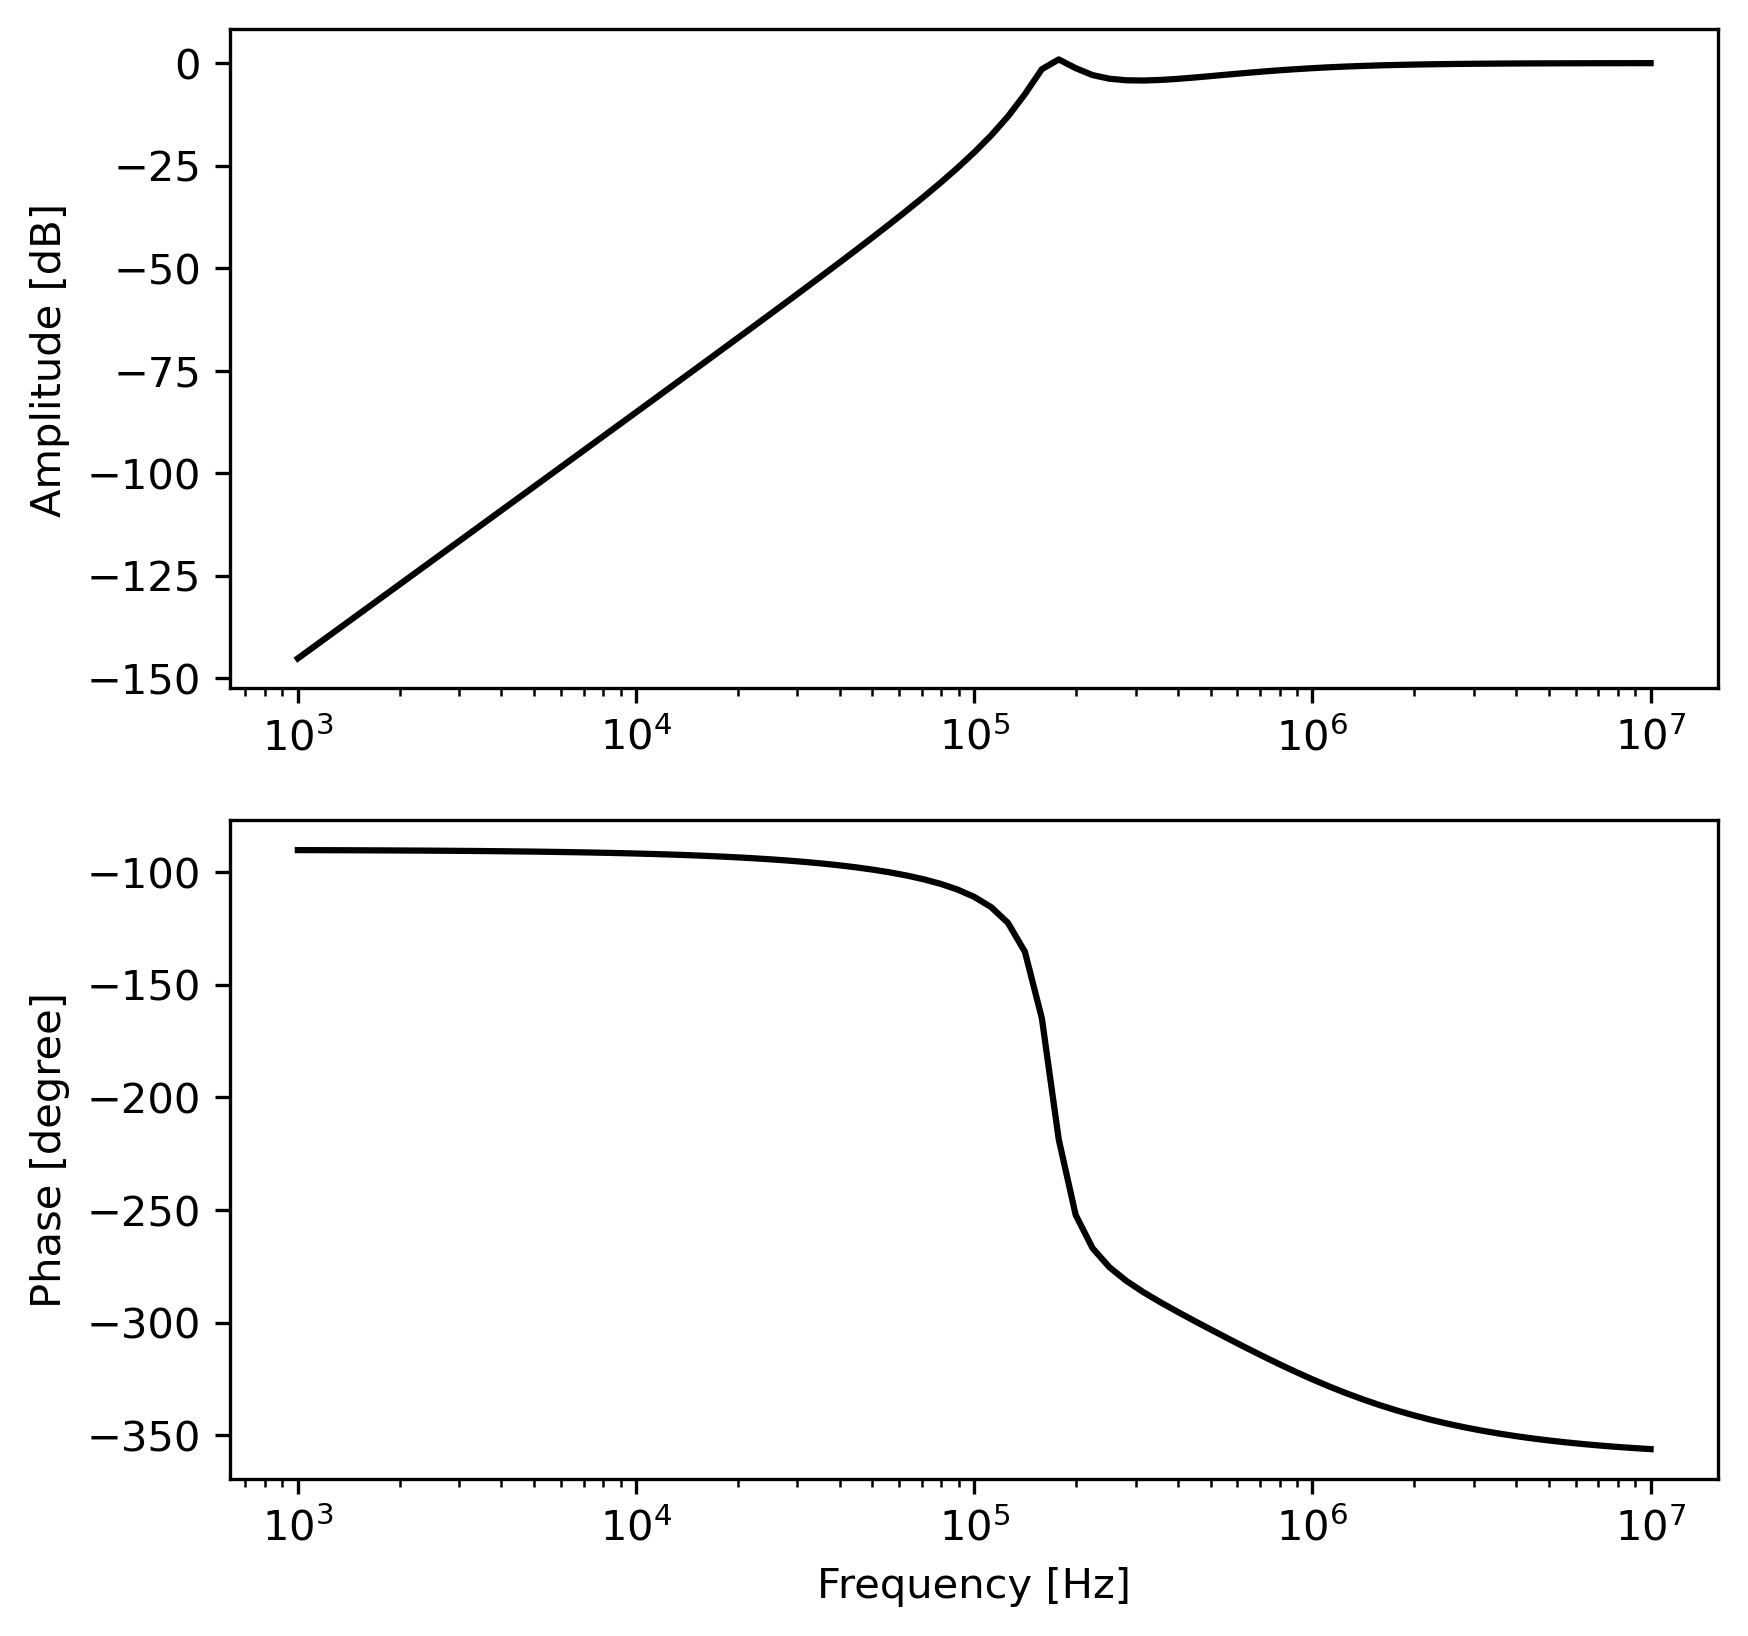

In [18]:
#周波数特性データのプロット

fig = plt.figure(figsize=(6.4,6.4), dpi=300)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#振幅のプロット
ax1.plot(df2['Freq'], df2['Amp_dB'], color='black')
ax1.set_ylabel("Amplitude [dB]")
ax1.set_xscale("log")

#位相のプロット
ax2.plot(df2['Freq'], df2['Phase'], color='black')
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Phase [degree]")
ax2.set_xscale("log")

#グラフ画像保存
plt.savefig(filename2 + 'sim2.png')
plt.show()

In [39]:
w1 = 150*1000 *2 * np.pi

In [40]:
w2 = 250 * 1000 *2 * np.pi

In [41]:
wb = w2 - w1

In [42]:
w00 = (w1*w2)**0.5

In [43]:
a1 = 1.8356533895614637e-06 * 400 * np.pi
a2 = 1.5906873632023114e-06 * 400 * np.pi
b1 = 8.49102264641539e-07 * 400 * np.pi
R = 1000
w0 = (w1*w2)**0.5

In [44]:
# ind
ind1 = a1 * wb * R/ w00 **2
c1 = 1/(a1*wb*R)
ind2 = a2 * wb * R/ w00 **2
c2 = 1/(a2*wb*R)
print(ind1, c1, ind2, c2)

9.790151410994472e-07 6.899531266258234e-07 8.483665937078995e-07 7.962059829151612e-07


In [45]:
# cap
i1 = R/b1/wb
cap1 = b1*wb/w00**2/R
print(i1, cap1)

1.4915927659949184 4.528545411421541e-13


## バンドパスフィルタ

In [46]:
# ind
ind11 = a1* R/wb
c11 = wb /(a1*w0**2*R)
ind12 = a2* R/wb
c12 = wb /(a2*w0**2*R)
print(ind11, c11, ind12, c12)

3.6713067791229274e-06 1.839875004335529e-07 3.181374726404623e-06 2.1232159544404297e-07


In [47]:
# cap
i11 = wb*R/(w0**2*b1)
cap11 = b1/(wb*R)
print(i11, cap11)

0.3977580709319782 1.6982045292830782e-12
